# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가을 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 전처리, 제공을 위한 배치, shuffling등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공


## 데이터셋 API 사용
1. <span style='font-size:1.2em;font-weight:bolder'>Dataset 생성</span>
    - raw dataset을 지정
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스 등을 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. <span style='font-size:1.2em;font-weight:bolder'>제공 데이터 전처리</span>
    - map(함수) : 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - filter(함수): 특정 조건의 데이터만 제공하도록 처리.
        - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.
3. <span style='font-size:1.2em;font-weight:bolder'>Dataset을 사용해 데이터 제공</span>
    - batch(), shuffle()을 이용해 제공 방식 지정
        - batch(size): 학습/평가시 한번에 제공할 batch size 지정
            - size: int. batch size 지정
            - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    -  shuffle(buffer 크기): dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - repeat(count): 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다.
        
### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.


In [1]:
import tensorflow as tf
import numpy as np

In [2]:
raw_data = np.arange(10)
raw_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(raw_data)
# 데이터셋 객체 생성 함수 - raw data 타입에 따라 바뀜. 메모리에 있는 건 fromtensorslicses 사용
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [4]:
# Dataset으로부터 값 조회
# take() 함수 사용 or 반복문 이용 (Dataset => iterable 타입)
for data in dataset:
    print(data)   # tensorflow의 배열 타입 - ndarray랑 거의 비슷하다...

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [5]:
raw_data2 = np.arange(10, 20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [6]:
# 학습 - model.fit(X, y) - X_train과 y_train 묶어줌!!
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data, raw_data2))
for X, y in dataset2:
#     print(data)   # 같은 인덱스의 값들이 tuple로 묶여서 반환됨
#     print(type(data))
    print(X, y)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


In [7]:
# dataset.take(개수): 지정한 개수만큼 dataset에서 조회
dataset3 = dataset.take(3)
print(type(dataset3))   # TakeDataset
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [8]:
# dataset.shuffle(buffer_size:정수): dataset의 원소들을 섞어줌. buffer size는 메모리가 허용하는 한 raw_data와 같은 개수로 지정
dataset4 = dataset.shuffle(10)
print(type(dataset4))   # ShuffleDataset
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [9]:
# dataset.batch(batch_size): 한번에 제공하는 데이터의 개수
dataset5 = dataset.batch(3)
print(type(dataset5))   # BatchDataset
for data in dataset5:
    print(data)
    print(type(data))  # EagerTensor
    break

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [10]:
d = dataset.shuffle(10).batch(3)
for data in d:
    print(data)

tf.Tensor([6 9 8], shape=(3,), dtype=int32)
tf.Tensor([7 0 5], shape=(3,), dtype=int32)
tf.Tensor([3 2 4], shape=(3,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)


In [11]:
# dataset.repeat(count): 전체 데이터셋을 count만큼 반복해서 제공, count 생략하면 무한제공
dataset7 = dataset.repeat(3)
print(type(dataset7))   # RepeatDataset
for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
t

In [12]:
dataset8 = dataset.shuffle(10).batch(5).repeat(3)
for data in dataset8:
    print(data)

tf.Tensor([2 0 6 7 9], shape=(5,), dtype=int32)
tf.Tensor([4 5 8 3 1], shape=(5,), dtype=int32)
tf.Tensor([1 5 9 0 3], shape=(5,), dtype=int32)
tf.Tensor([6 4 2 8 7], shape=(5,), dtype=int32)
tf.Tensor([8 6 9 2 4], shape=(5,), dtype=int32)
tf.Tensor([5 1 0 7 3], shape=(5,), dtype=int32)


In [13]:
# dataset.map(함수): 원소의 값을 함수로 변환해서 제공. 매개변수: dataset이 제공하는 값을 받는 변수, 반환값: dataset이 제공하는 값
# 값들을 제곱해서 반환
# mapping함수 - 입력 데이터(argument)와 출력 데이터(return)의 데이터 타입이 동일해야 한다
def mapping_func(x):
    return x**2

dataset9 = dataset.map(mapping_func)
print(type(dataset9))

for data in dataset9:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [15]:
def mapping_func2(x, y):   # x = raw data, y = raw data2
    return x**3, y # y 처리하지 않더라도 무조건 반환

dataset10 = dataset2.map(mapping_func2)

for data in dataset10:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [16]:
# 람다(표현)식: 함수를 연삭 식으로 정의. lambda 매개변수들: 반환값
test2 = lambda x: x + 10
test2(10)

20

In [18]:
test3 = lambda x, y: (x+10, y*2)
test3(10, 10)

(20, 20)

In [19]:
dataset11 = dataset.map(lambda x: x**2)
for d in dataset11:
    print(d)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [20]:
dataset12 = dataset2.map(lambda x, y: (x**3, y**2))
for d in dataset12:
    print(d)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=100>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=121>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=144>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=169>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=196>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=225>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=256>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=289>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=324>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=361>)


In [22]:
# dataset.filter(함수): 원소들 중에서 특정 조건이 true인 값들만 제공
# 함수- 매개변수: dataset이 제공하는 값을 받을 변수 (dataset의 배열개수만큼 지정), 반환값은 불리언
# 원소들 중에서 2의 배수만 제공하는 dataset
def filter_func(x):
    return x%2 == 0    # x가 2의 배수인 경우 True 반환

dataset13 = dataset.filter(filter_func)
print(type(dataset13))
for d in dataset13:
    print(d)

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [23]:
dataset14 = dataset.filter(lambda x : x > 5)
for d in dataset14:
    print(d)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [25]:
raw_data = np.arange(-10,11)
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data).filter(lambda x:x>=0).map(lambda x:x+10).shuffle(raw_data.size).batch(3)
for d in dataset_final:
    print(d)

Cause: could not parse the source code of <function <lambda> at 0x0000015A36F18940>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names.
Match 0:
(lambda x: (x + 10))

Match 1:
(lambda x: (x >= 0))

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000015A36F18940>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names.
Match 0:
(lambda x: (x + 10))

Match 1:
(lambda x: (x >= 0))

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000015A36F185E0>: found multiple definitions with identical signatures at the location. This error may be avoided

# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [26]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, models   # layers: Deeplearning 모델의 Layer를 정의하는 클래스들을 가진 모듈

In [ ]:
# 랜덤값들의 seed값 지정
np.random.seed(0)
tf.random_set_seed(0)

In [27]:
# 데이터를 로딩
(train_X, train_y), (test_X, test_y) = keras.datasets.boston_housing.load_data()
train_X.shape, train_y.shape, test_X.shape, test_y.shape

57344/57026 [==============================] - 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

In [28]:
train_X[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [29]:
train_y[:3]

array([15.2, 42.3, 50. ])

### 하이퍼 파라미터, 변수 정의

In [32]:
# 하이퍼파라미터
LEARNING_RATE = 0.001    # 학습률
N_EPOCHS = 200   # epoch 수 (fit 할 때 데이터를 몇 번 넣을지) 에폭 너무 많으면 과대적합 너무 적으면 과소적합
N_BATCHS = 32   # 배치 사이즈 - 파라미터를 몇 개의 데이터마다 업데이트할지 설정. 얘도 성능과 연관 있음

# 변수
N_TRAIN = train_X.shape[0]  # train 데이터셋의 데이터 개수
N_TEST = test_X.shape[0]    # test 데이터셋의 데이터 개수

### X, y 전처리, tf.Dataset 생성

In [30]:
# X 전처리 - scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

In [33]:
# Dataset 구현
# drop_remainder=True: 배치 사이즈보다 덜한 나머지는 버려라(제공하지 말아라) - 학습 효율을 위함
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

# batch size로 교차 검증하는 역할. 테스트 한 번만 하려면 batch size를 N_TEST로 주면 됨
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS)

### 모델 구현

In [34]:
# 모델(네트워크)을 정의하는 함수
def create_housing_model():
    # 모델 생성
    model = keras.Sequential()
#     model = models.Sequential()

    # 모델에 layer 추가
#     model.add(layers.InputLayer((13,)))   # InputLayer((한 개 데이터의 shape))
#     model.add(layers.Dense(units=32, activation='relu'))   # Dense layer엔 1차원 배열만 들어가야 함
# Dense layer - 유닛 개수 2배수를 사용, 큰 값에서 작은 값으로 줄여나간다
    model.add(layers.Dense(units=32, activation='relu', input_shape=(13,)))   # 첫 번째 hidden layer에 input_shape 지정 가능
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    # 출력 레이어: 회귀 - units=1로 지정(값 하나를 예측하기 때문), 활성함수는 주지 않음
    model.add(layers.Dense(units=1))
    
    return model

In [35]:
model = create_housing_model()
print(model)

In [36]:
# 생성된 네트워크의 구조(summary) 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


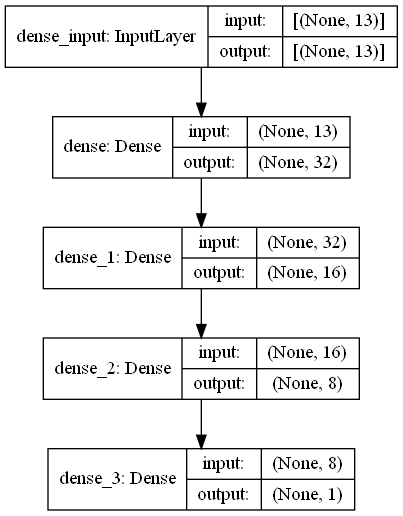

In [38]:
# 모델구조를 그래프로 확인 - 이미지로도 저장해줌 (파일 경로 설정 - to_file='파일경로/파일이름.png')
# graphviz가 설치돼있어야 함
keras.utils.plot_model(model, show_shapes=True)

## 2. Classification

### Fashion MNIST(MNIST) Dataset - 다중분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [30]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 위스콘신 유방암 데이터셋 - 이진분류 문제
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)